In [ ]:
#1. Load the demo dataset in dataframe object df
#2. Detect the outlier using ScatterPlot
#3. Handle the outlier using Quantile based flooring and capping (Hint: the outlier is capped at a certain value above the 90th percentile value
#or floored at a factor below the 10th percentile value)

In [ ]:
import pandas as pd
import numpy as np


df=pd.read_csv('/content/demo.csv')
df

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


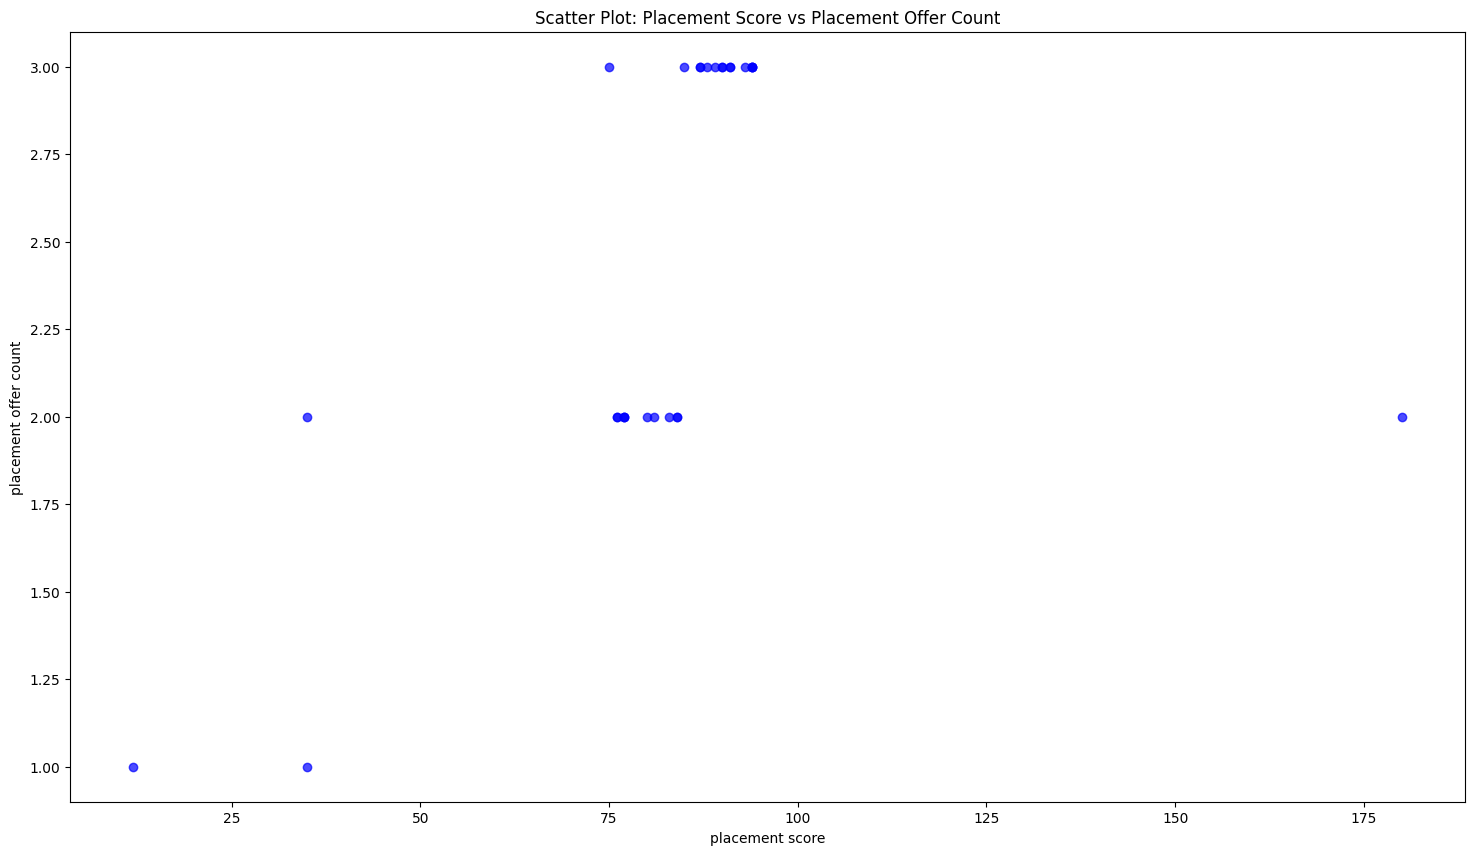

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
x_col = 'placement score'
y_col = 'placement offer count'
plt.scatter(df[x_col], df[y_col], color='blue', alpha=0.7)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Scatter Plot: Placement Score vs Placement Offer Count')

# Display the plot
plt.show()

In [ ]:
#These print row indices where data might be considered outliers.
#Based on condition
print(np.where((df['placement score'] < 50) & (df['placement offer count'] > 1)))
print(np.where((df['placement score'] > 85) & (df['placement offer count'] < 3)))


(array([6]),)
(array([11]),)


In [ ]:
#Flooring and Capping
p10 = np.percentile(df['placement score'], 10)
p90 = np.percentile(df['placement score'], 90)

print("10th Percentile (floor):", p10)
print("90th Percentile (cap):", p90)

10th Percentile (floor): 67.00000000000001
90th Percentile (cap): 94.0


In [ ]:
# Apply flooring and capping
df['updated placement score'] = np.where(df['placement score'] > p90, p90, df['placement score'])
df['updated placement score'] = np.where(df['updated placement score'] < p10, p10, df['updated placement score'])
print(df)

    math score  reading score  writing score  placement score  \
0           80             68             70               89   
1           71             61             85               91   
2           79             16             87               77   
3           61             77             74               76   
4           78             71             67               90   
5           73             68             90               80   
6           77             62             70               35   
7           74             45             80               12   
8           76             60             79               77   
9           75             65             85               87   
10         160             67             12               83   
11          79             72             88              180   
12          80             80             78               94   
13          78             69             71               90   
14          75           

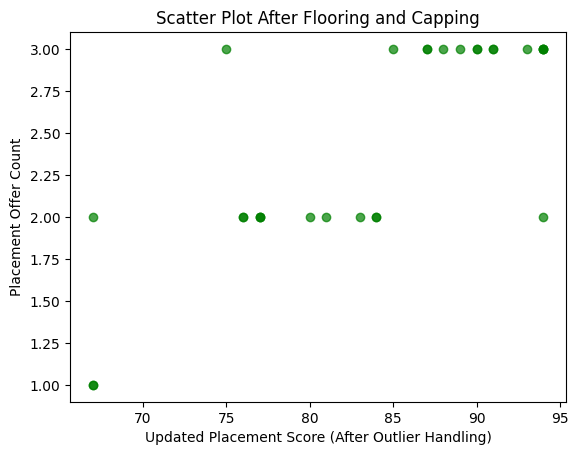

In [ ]:
#plt.figure(figsize=(18, 10))
plt.scatter(df['updated placement score'], df['placement offer count'], color='green', alpha=0.7)
plt.xlabel('Updated Placement Score (After Outlier Handling)')
plt.ylabel('Placement Offer Count')
plt.title('Scatter Plot After Flooring and Capping')
plt.show()